# CS224n: NLP with Deep Learning

# Lecture 7: Vanishing Gradients and Fancy RNN

---

## Vanishing Gradient Problem

### Intuition

* When the gradients $\frac{\partial {h^{(i)}}} {\partial h^{(i-1)}}$ are small,  
the overall gradient is going to get smaller and smaller, as we go backwards

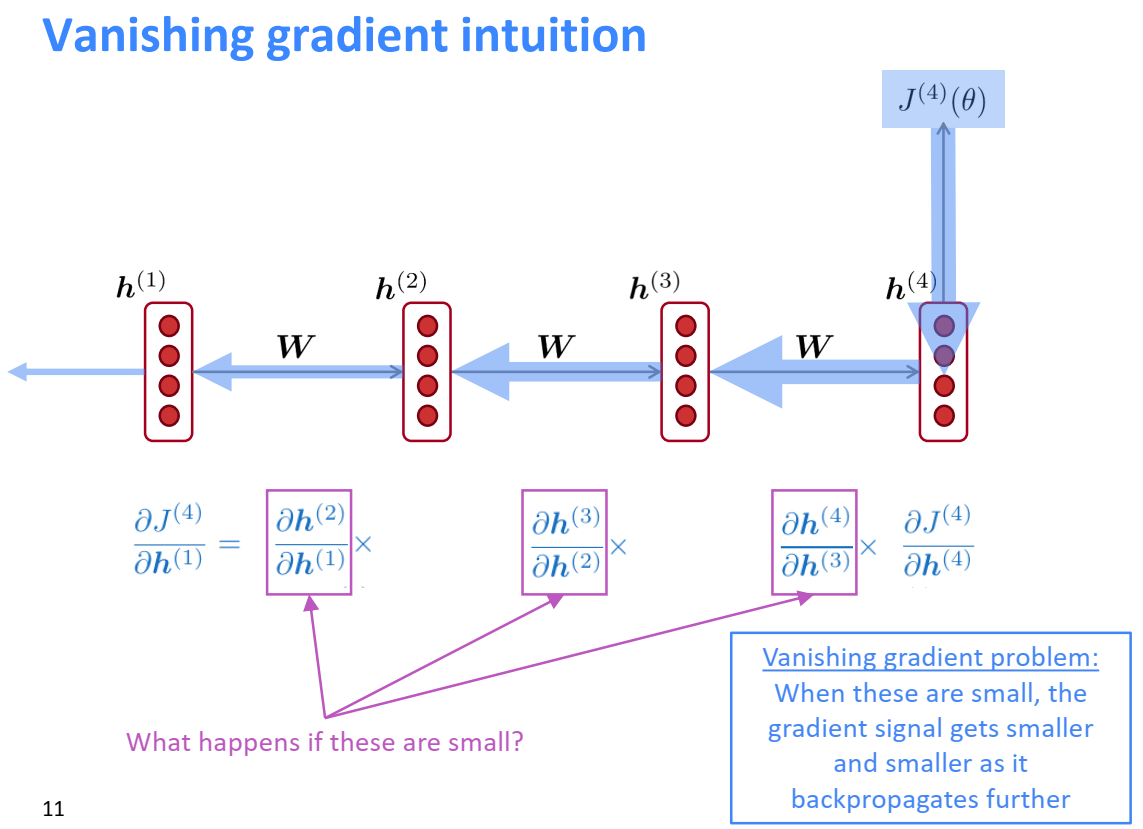

* If the largest eigenvalue of $W_{h}$ is < 1:  
the gradient will shrink exponentially

→ Vanishing gradient !

### Proof Sketch

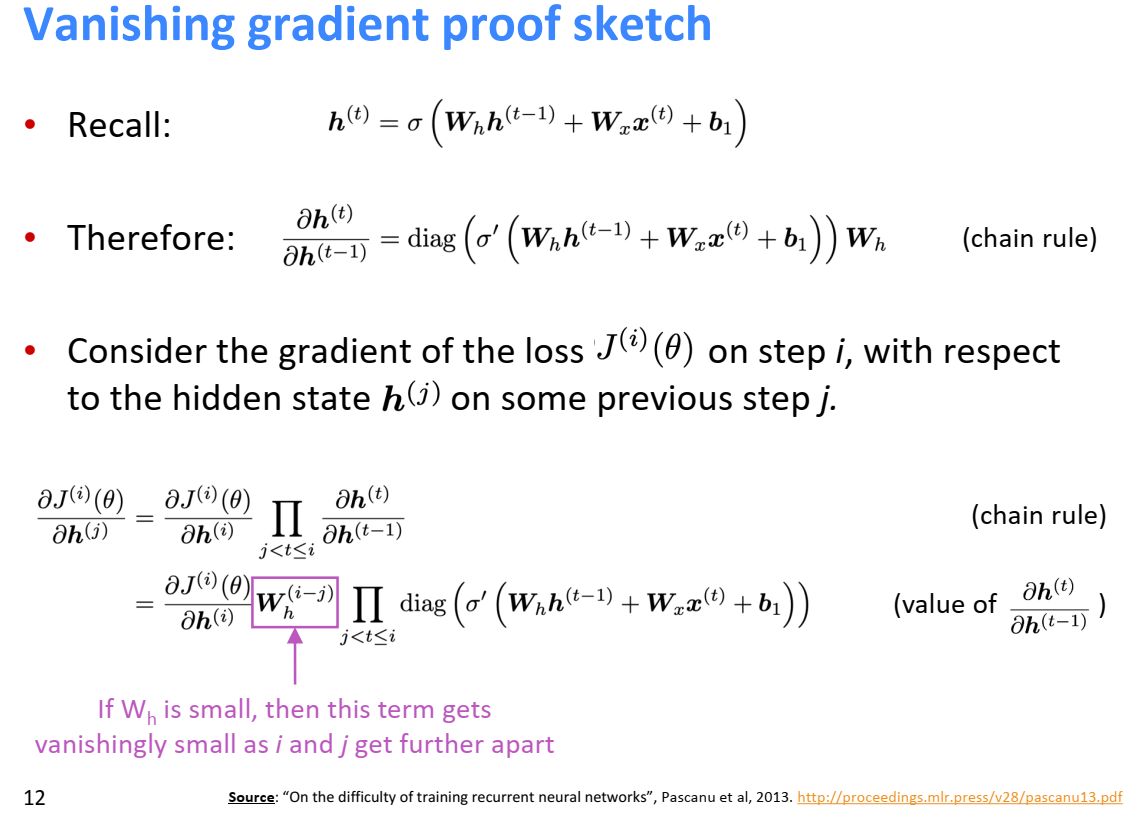

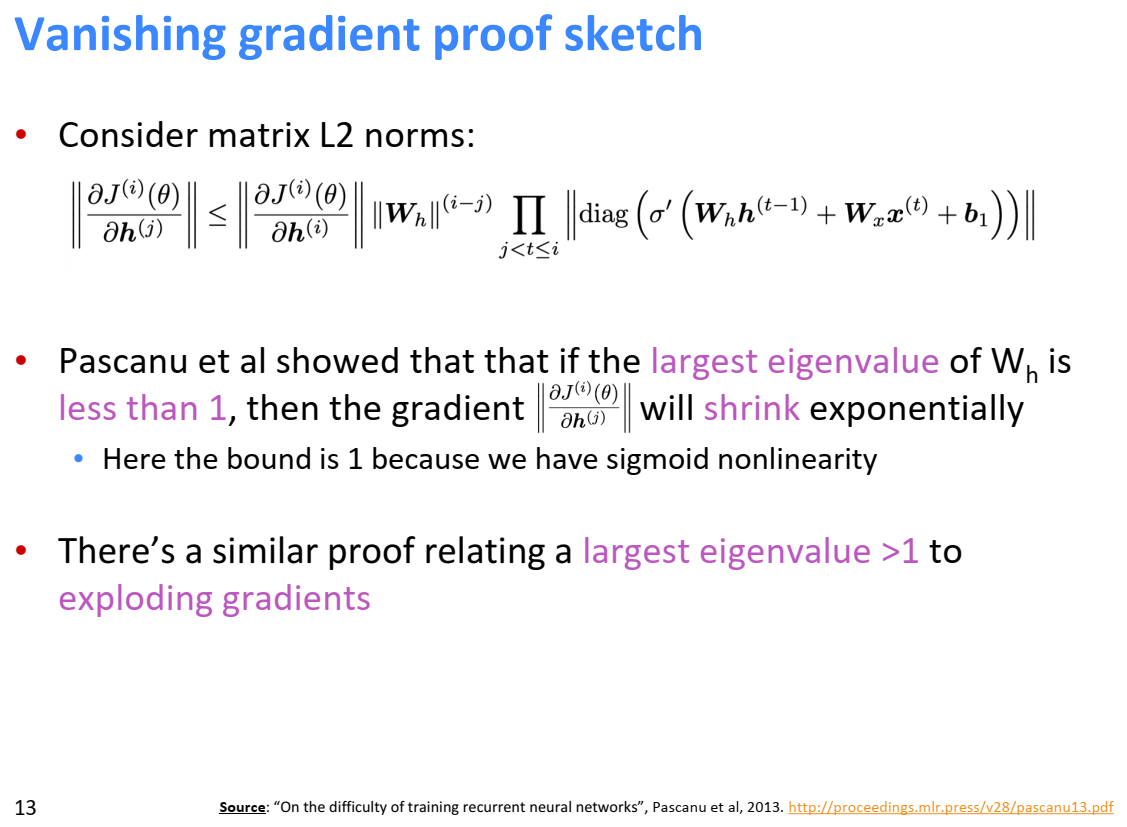

**But why is this a problem?**

* The gradient from steps far away will be much smaller than gradients from close-by

→ The weights will only be updated with respect to close effects, not long-term !

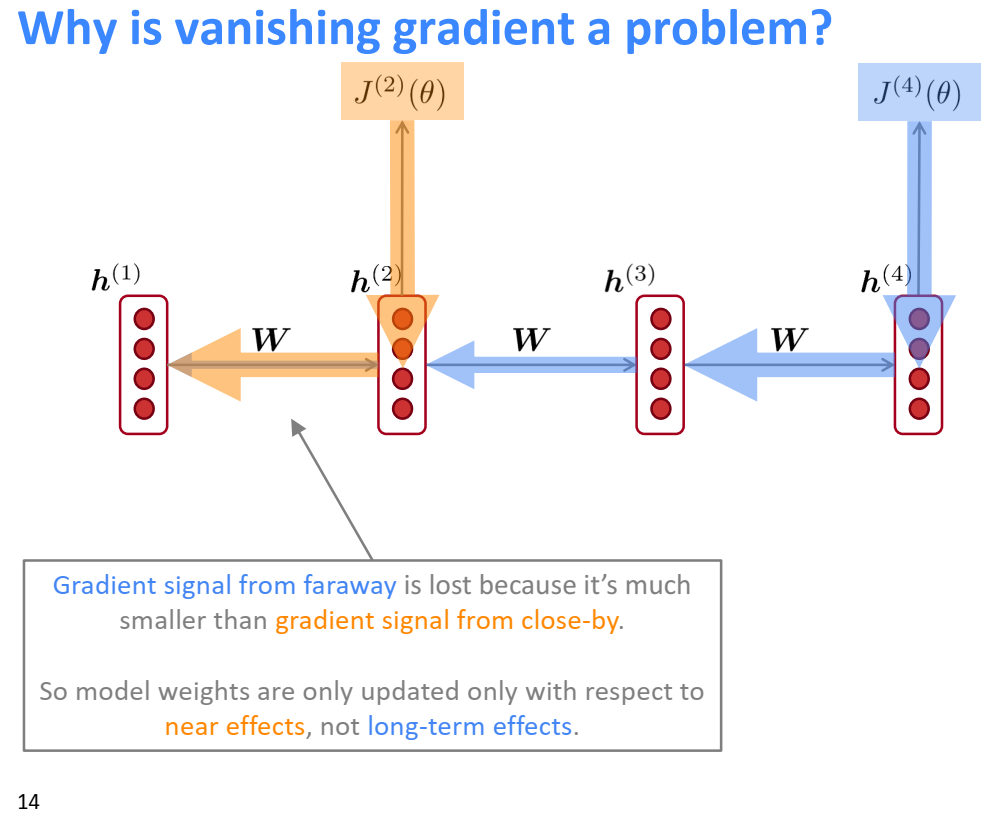

**Remark:**

* We are studying $\frac{\partial {J}} {\partial h^{(i-1)}}$ because we have to calculate it to get  $\frac{\partial {J}} {\partial W}$

#### Effect on RNN-LM

* Incapability of learning long-distance dependencies

* Syntactic recency (correct):  
Making dependencies to words close **in their syntax**
* Sequential recency (incorrect):  
Making dependencies to words close **spatially**

Unfortunately, RNN-LMs are better at learning sequential recency than syntactic recency:  
(see example below)

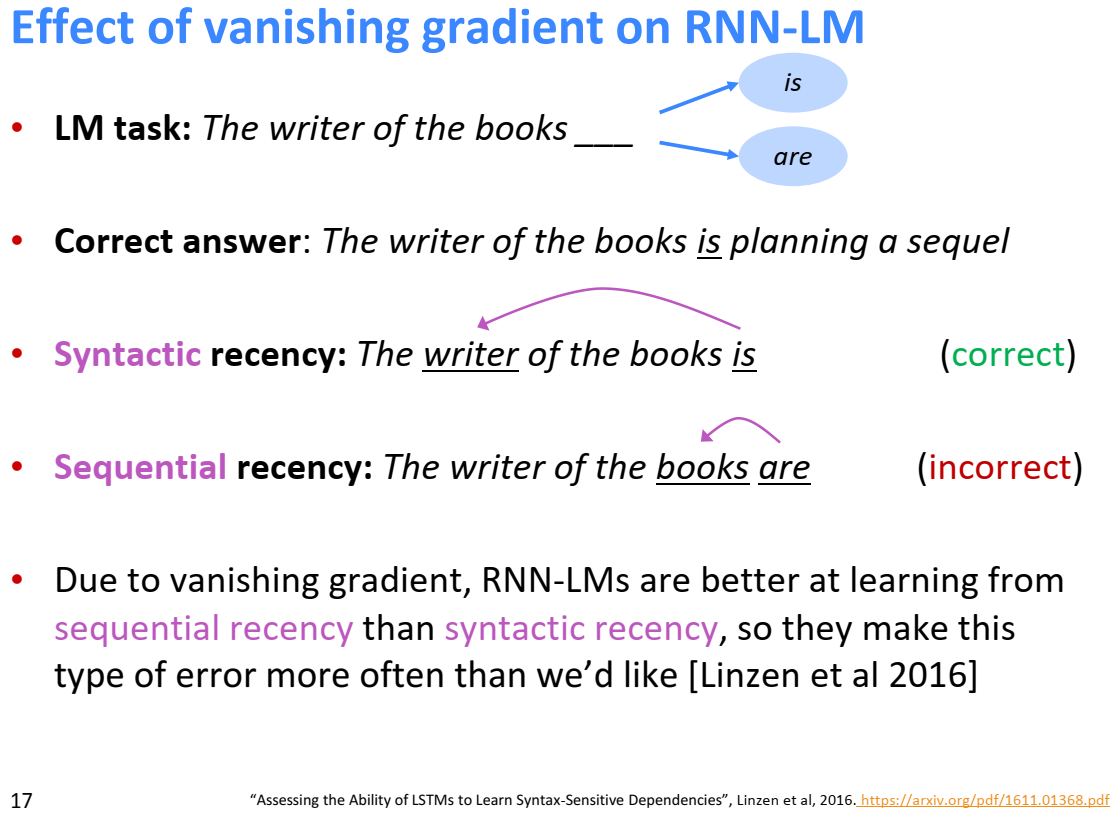

### Exploding Gradient Problem

* If our gradient is too big, the update term for our parameter becomes too big

→ Take update steps too large, and get stuck in a local optimum

→ Get **Inf** or **Nan** values

**Solution**: Gradient clipping

* Scale down gradients that are higher than some thereshold

## LSTM

* Reason to exist = To solve the vanishing gradient problem

* A RNN with ability to learn / preserve information from many timesteps ago  

What about a RNN with separate memory?

### Structure

For each step $t$:
* a hidden state $h^{(t)}$: $(n,1)$
* a cell state $c^{(t)}$: $(n,1)$  
Stores long-term information

LSTM can erase, write and read information from cell!  

This is done using gates of length $n$, whose values are in $[0,1]$, thanx to our **sigmoid** friend:
* 1: open gate
* 0: closed gate

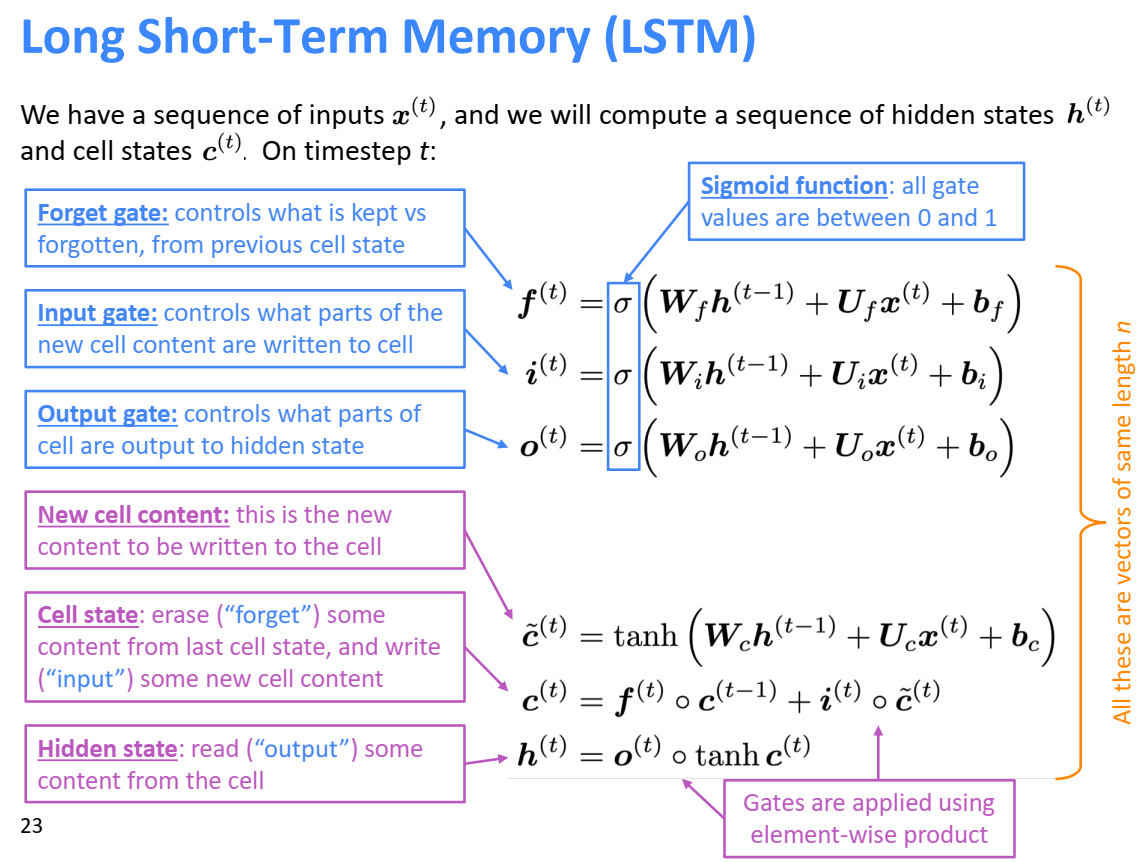

Cell state $c^{(t)}$ is the sum of:
* previous cell state, masked by our forget gate
* our new cell, masked by our input gate

We can think of the hidden states as the ouput of the RNN

* These cell states ~ general memory, generally not accessible from the outside
* The hidden states will be passed on to the model

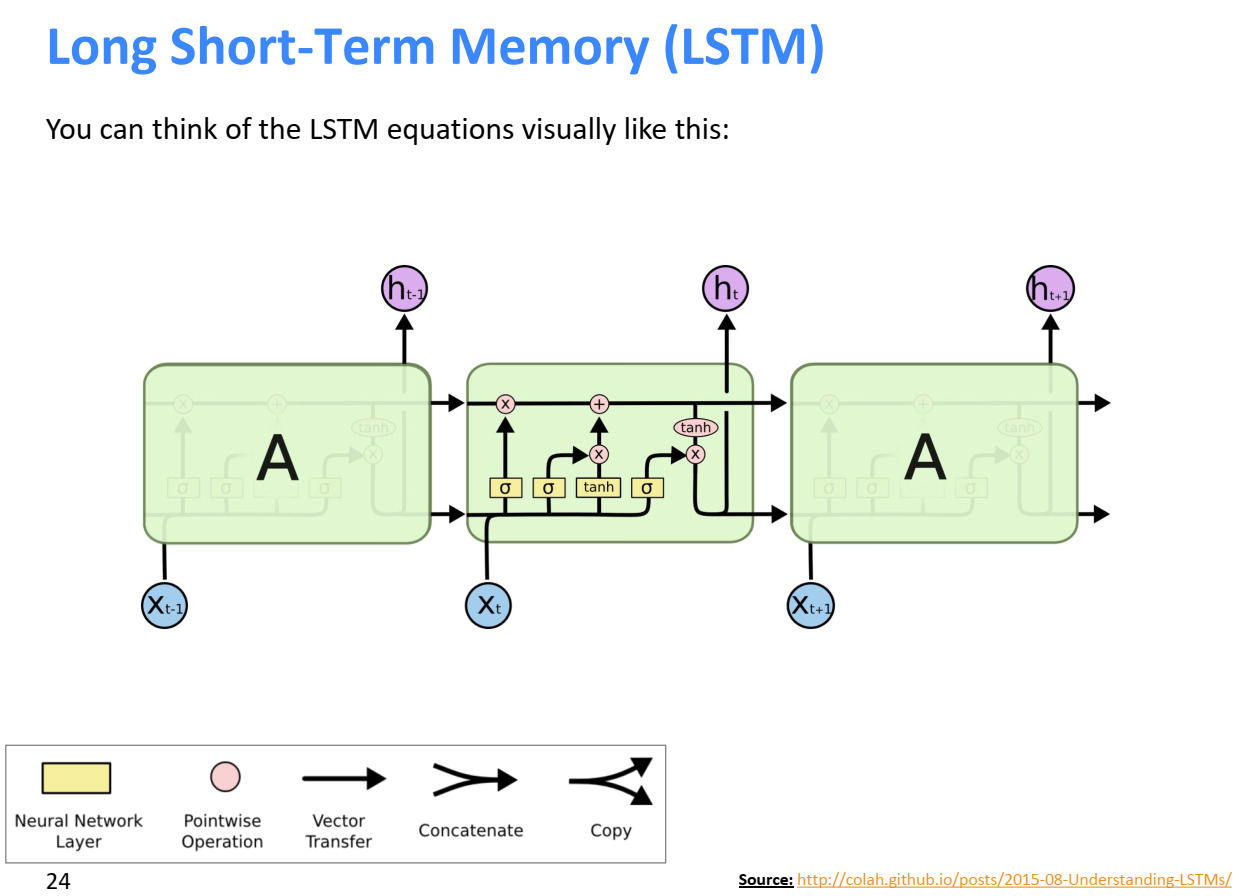

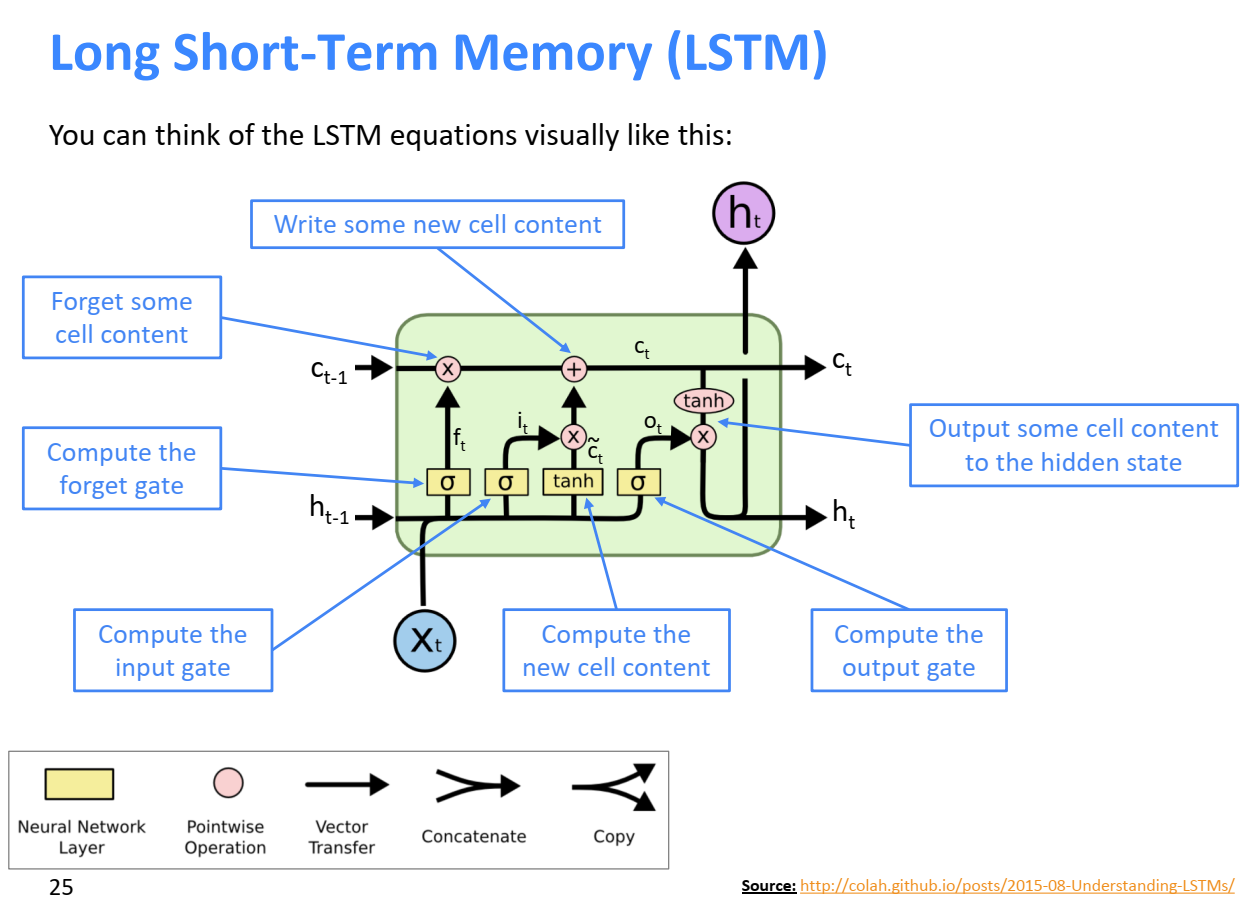

It is possible to set the forget gate so that the LSTM remembers everything from each time step

/!\\ We could still have vanishing/exploding gradients, even when using LSTMs !

* With RNN, the hidden states were a bottleneck:  
all gradients have to pass through them !!

* With LSTM, we can view the cell as a shortcut connection  
THere is a potential route within the cell that doesn't make the gradient vanish !

### Applications

* Handwriting recognition
* Speech recognition
* Machine translation
* Parsing
* Image captioning

However, more recently, Transformers seem to have taken over ! !

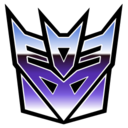

## Gated Recurrent Units (GRU)

* Simpler alternative to LSTMs
* We have no cell state, only hidden states
* But we still have our cool gates!

### Gates

* Update gate:  
controls what is updated or preserved  
~ input & forget gates for LSTM

* Reset gate:  
selects which parts of the previous state are useful

* News hidden state = combination of previous hidden state, and computed new content

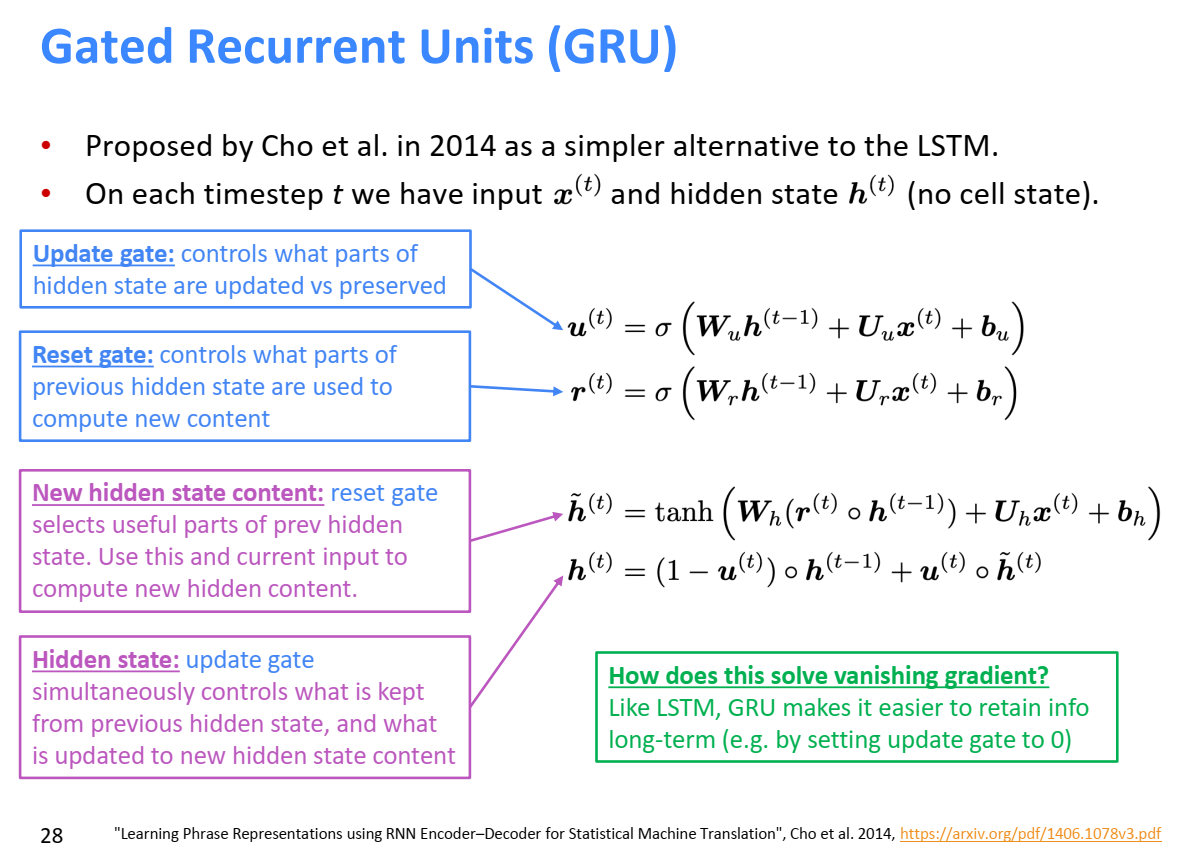

GRU compared to LSTM:
* Quicker
* Less parameters
* Similar performances

## Other fixes

### Gradient clipping

### Skip connections

* Create direct connections from lower layers to newer layers  
→ Allowing the gradients to flow more easily

Example: ResNet

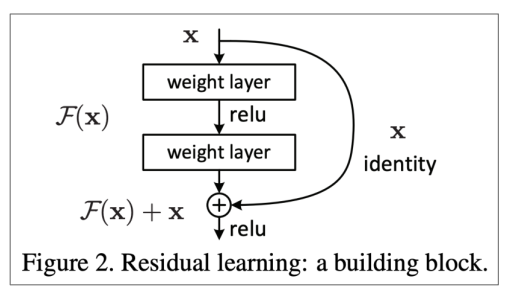

* DenseNet:  
Going even further: connect every layer to each other!

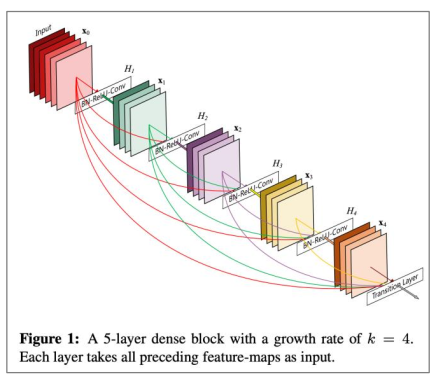

## Recap 1

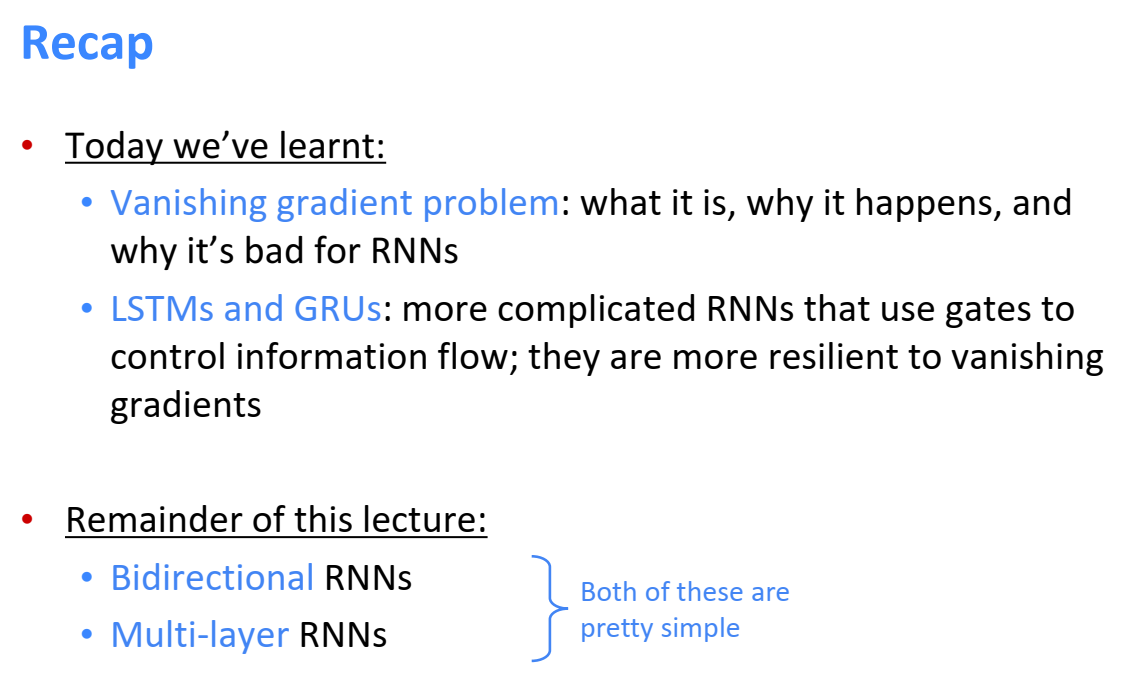

## More fancy RNN variants

### Bidirectional RNN

#### Motivation

* Our contextual representation only gets information from the left context !  

We might want to get context coming from the right direction as well !

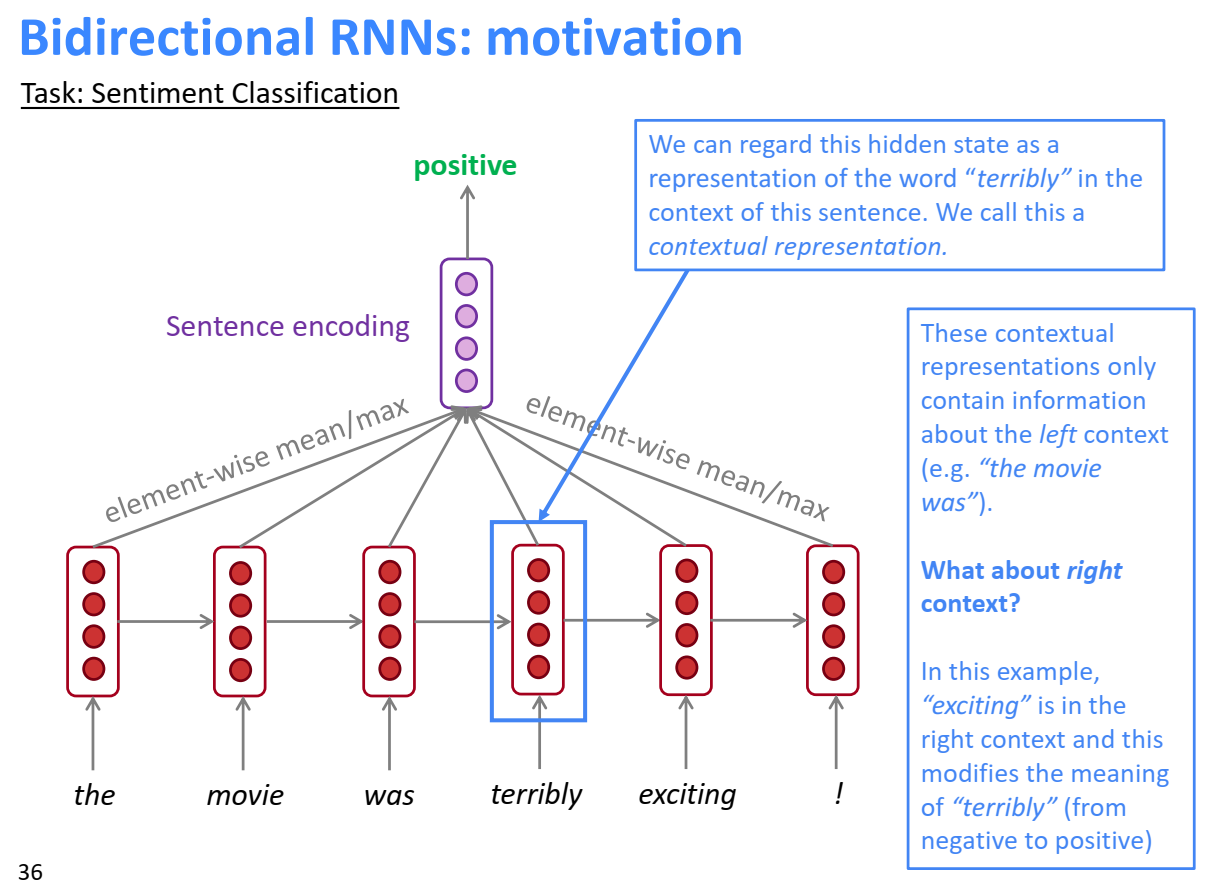

* We have 2 parallel RNN: one for each direction
* Hidden states = [Hidden state from left, Hidden state from right]

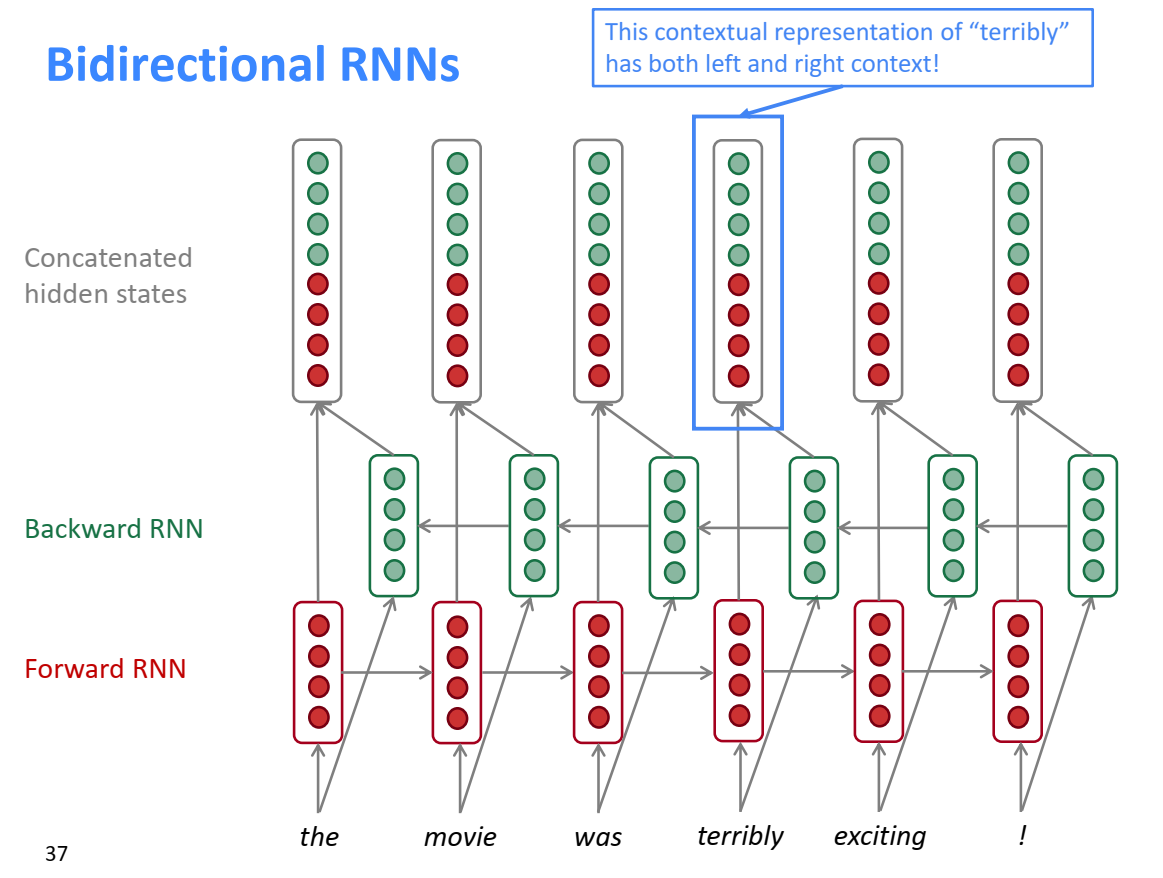

#### Notations

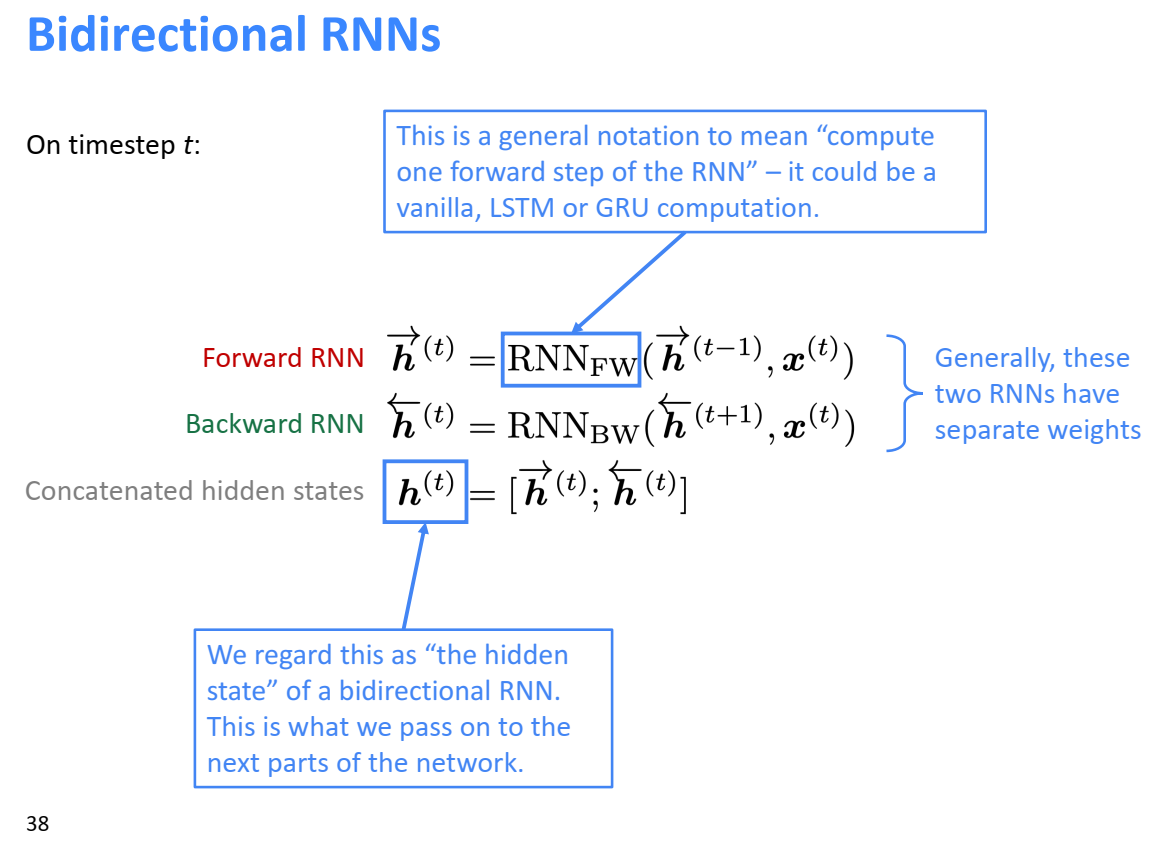

* The 2 RNNs are trained together, not separately

* Not useful for Language Modelling (as the Right context is missing, by definition! )

### Multi-layer RNN

## Big section Title

### Sub-section Title

* King - Man ~= Idea of Kingship without the Man Part
* +Woman = add Woman Idea to it
* => Get Queen

Plot words on a scatter plot:

### Word2vec : Vectorization

We have 2 big matrices:
* 1 that represents every outside word's vector $U$
* 1 which represents every center word's vector $V$

$$U = \begin{bmatrix}[outside\,word\,vector\,1]
\\ \vdots
\\ [outside\,word\,vector\,n] \end{bmatrix}$$

$$V = \begin{bmatrix}[center\,word\,vector\,1]
\\ \vdots
\\ [center\,word\,vector\,n] \end{bmatrix}$$

* We multiply $U$ by a center word $v_{4}$

$$\begin{align*}
U \cdot v_{4} &= \begin{bmatrix}[outside\,word\,vector\,1]
\\ \vdots
\\ [outside\,word\,vector\,n] \end{bmatrix}
\cdot v_{4}
\\ &=\begin{bmatrix}[similarity\,(u_{1}, v_{4})]
\\ \vdots
\\ [similarity\,(u_{n}, v_{4})] \end{bmatrix}
\end{align*}$$

* We apply softmax to get a vector of probabilities

$$softmax(U\cdot u_{4})$$

#### Remark 1
**The outside words that are predicted will always be the same !!**

This means that our model will give a reasonably high probability estimate to all words that occur in the context

#### Remark 2
The words 'and', 'the', 'of', ... will have very high frequency with all the other words

#### Remark 3
The 2D-projections of the word clouds are very misleading  
In very high dimensional space, a word can be close to lots of other words

---

## Optimization: Gradient Descent

**Objective:**
* Minimise cost function $J(\theta)$

**Idea:** 
* For current value of $\theta$, calculate the gradient of $J(\theta)$
* Take a small step in the direction of negative gradient

$$ \theta^{new} = \theta^{old} - \alpha \nabla_{\theta}J(\theta) $$ where $\alpha$ is the learning rate

### Stochastic Gradient Decsent

**Problem:**

* $J(\theta)$ is a function of all windows in the corpus!!

**Solution:**

Stochastic Gradient Descent !

* Repeatedly sample windows
* Update our parameters after going through each window
* The parameters are updated with amazingly noisy gradient, but it doesn't matter too much 
* It allows us to go much quicker

#### Remark 1

Choose mini-batch size of 32, 64, or other powers of 2, as they allow to make the most out of parallelization

#### Remark 2

* In each window, we have a certain number of words $2m+1$
* Our parameter vector $\theta$ is in $\mathbb{R}^{2dV}$, which is much bigger
* Hence, $\nabla_{\theta} J(\theta)$ is a very sparce matrix

=> **Idea:**

Only update the word vectors that appear in our window!

### Why 2 vectors for each word?

* It is easy to optimize
* We just average them to get a unique word vector in the end

#### 2 Model variants

1. Skip-gram: Predict outside words (position independent) given center word
2. Continuous Bag of Words: predict center word from a Bag of context words

The results we get via these 2 methods are quite similar, as the dot product is symmetric

### Negative Sampling

**Idea:**

Train binary logistic regression for a true pair (center word & word in its context window)  
VS  
Several noise pairs (center word & a random word) = Negative samples

* Maximize probability that real outside word appears
* Minimize probability that random words appear around center word

We sample these words using the Unigram distribution to determine their probability of being sampled

$$P(w) = U(w)^{3/4} / Z$$

* The 3/4 power helps to make the most frequent words appear more often, and the less frequent words appear more
* $Z$ is a normalization factor

**Remark:**

The sigmoid function is like a binary case for the softmax function: maps our values to a probability distribution in [0,1]

-----------------

## Count-based methods

We could also count co-occurences of words within a certain window...  
Why don't we just do that?

We could create a matrix of co-occurrences  


![Co-Occurences matrix](images\Lecture02_cooccurences_matrix_boxes.png)

2 words would be 'similar' if their co-occurence vectors are similar

### Reduced SVD

Singular Value Decomposition

$$ X = U * \Sigma * V^{T} $$

* $\Sigma$ is a diagonal matrix (can be rectangular if X not square)  
Its diagonal values are in decreasing order
* $U$, $V$ are square matrices

**Reduced version:**  
We remove the dimensions with the lowest diagonal values for $\Sigma$  
The corresponding column of $U$, and line of $V^{T}$ are removed as well  
We then have $k$ dimensions left

We the get the best rank $k$ approximation to X, in terms of least squares

### Improvement ideas (*Rohde, 2005*)

* Windows that give more importance to closer words:  
Same as in word2vec, we sample closer words more often

### Comparison of the 2 methods

![](images\Lecture02_CountBased-VS-DirectPred.png)

---

## GloVe

### General Idea

**You want to have components of meaning to be linear operations in a vector space !**  
In particular, ratios of co-occurrence probabilities

We want to have dot-product to be equal to log(Probability)

$$ w_{i} \cdot w_{j} = log P(i|j) $$

so that:

$$ w_{x} \cdot (w_{a} - w_{b}) = log \frac {P(x|a)} {P(x|b)} $$

Thus, 
* The objetive function is the squared difference between the dot-product and the log of the co-occurence probabilities  
* It is complexified a bit by adding bias terms for both words
* The $f$ function is used to limit the influence of very common words pairs

$$ J = \sum_{i, j=1}^V f(X_{ij}) \, (w_{i}^{T} \tilde{w_{j}} + b_{i} + \tilde{b_{j}} - log X_{ij})^2 $$

---

## Evaluating word vectors

Intrinsic VS Extrinsic evaluation

### Intrinsic

* Evaluation on a specific / intermediate task
* Fast to compute

### Extrinsic

* Evaluation on a real task that humans like to use  
(web search, question answering, phone dialogue system...)
* Can take a long time to compute accuracy
* Unclear where the problem is:
    * The subsystem?
    * Its interaction with other subsystems?

---

### On the Dimensionality of Word Embeddings

There seems to be a blip at 200-300, for the dimension of the embeddings, that seems to optimize performance

The performance stays flat, even when we continue to increase dimensionality up to infinity

Using Wikipedia data seems to work better than a news corpus

---

## Word Senses

Words can have lots of meanings!  
(especially common words, and words that have existed for a long time)

### First simple idea

* Cluster word windows around words: 1 word vector for each sense

### Different senses using linear superposition

Different senses of a word reside in a weighted sum of the vectors of each sense

$$ v_{pike} = \alpha_{1} v_{pike_{1}} + \alpha_{2} v_{pike_{2}} + \alpha_{3} v_{pike_{3}} $$

where:
$$ \begin{align*}
 \alpha_{1} &= \frac{f_{1}}{f_{1}+f_{2}+f_{3}}
\\ f_{i} &= frequency\,(word\,i)
\end{align*} $$

Because we have so many dimensions, and as the words vectors for each sense are sparse, the results we get are quite good !!

Thus, we can get back the vectors of the senses using the weighted summed vector !!

---

## LaTeX templates

$$U = \begin{bmatrix}[outside\,word\,vector\,1]
\\ \vdots
\\ [outside\,word\,vector\,n] \end{bmatrix}$$

$$V = \begin{bmatrix}[center\,word\,vector\,1]
\\ \vdots
\\ [center\,word\,vector\,n] \end{bmatrix}$$

* We multiply $U$ by a center word $v_{4}$

$$\begin{align*}
U \cdot v_{4} &= \begin{bmatrix}[outside\,word\,vector\,1]
\\ \vdots
\\ [outside\,word\,vector\,n] \end{bmatrix}
\cdot v_{4}
\\ &=\begin{bmatrix}[similarity\,(u_{1}, v_{4})]
\\ \vdots
\\ [similarity\,(u_{n}, v_{4})] \end{bmatrix}
\end{align*}$$

* We apply softmax to get a vector of probabilities

$$ \theta^{new} = \theta^{old} - \alpha \nabla_{\theta}J(\theta) $$ where $\alpha$ is the learning rate

$$ X = U * \Sigma * V^{T} $$

$$P(w) = U(w)^{3/4} / Z$$

$$ w_{i} \cdot w_{j} = log P(i|j) $$

so that:

$$ w_{x} \cdot (w_{a} - w_{b}) = log \frac {P(x|a)} {P(x|b)} $$

$$softmax(U\cdot u_{4})$$

$$ J = \sum_{i, j=1}^V f(X_{ij}) \, (w_{i}^{T} \tilde{w_{j}} + b_{i} + \tilde{b_{j}} - log X_{ij})^2 $$

$$ v_{pike} = \alpha_{1} v_{pike_{1}} + \alpha_{2} v_{pike_{2}} + \alpha_{3} v_{pike_{3}} $$

where:
$$ \begin{align*}
 \alpha_{1} &= \frac{f_{1}}{f_{1}+f_{2}+f_{3}}
\\ f_{i} &= frequency\,(word\,i)
\end{align*} $$